# Linear regression with one varibale
## 利用城市人口(Population)預測餐廳收益(Profit)
### 方法一：自己撰寫程式碼實現單變量線性回歸
### 方法二：利用 scikit-learn 套件實現單變量線性回歸
---

### 方法一：自己撰寫程式碼實現待變量線性回歸

1. 讀取檔案，並查看檔案訊息

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

path = os.getcwd() + '\data\ex1data1.txt'

data = pd.read_csv(path, header=None, names=['Population', 'Profit'])


print(data)

data.describe()

    Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


2. 將資料視覺化，方便我們了解資料分布

    資料只有兩個個變數，可使用散點圖呈現

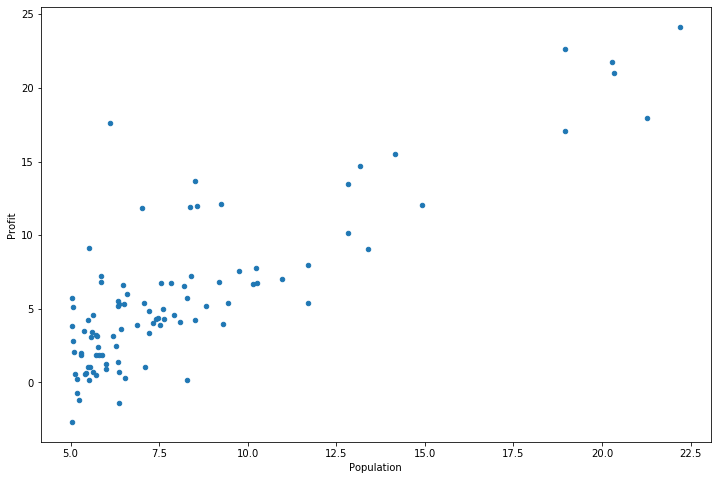

In [2]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

3. 撰寫cost function  

In [3]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

## X, y, theta 需為numpy matrices

4. 將資料轉換成向量，以利計算cost 與 gradient  
  
X = \begin{bmatrix} 1 & x^1_1 \\ 1 & x^2_1 \\ 1 & x^3_1 \end{bmatrix}  
y = \begin{bmatrix} y^1_1 \\ y^2_1 \\ y^3_1 \end{bmatrix} 



In [4]:
data.insert(0, 'Ones', 1)
# X:training data ， y:target
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
print('X = ',X.head())
print('y = ',y.head())

X =     Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
y =      Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


5. 將X, y, theta 轉為numpy matrices

In [5]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))


X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

6. 計算thera = 0 的cost

In [6]:
computeCost(X,y,theta)

32.072733877455676

7. 撰寫 gradient descent

In [7]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
    
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
          
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost
    print("i:",i)

8. 參數設定

In [8]:
alpha = 0.01 #learning rate
iters = 1000



9. 執行 gradient descent

In [9]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

10. 計算最佳thera的cost

In [10]:
computeCost(X,y,g)

4.515955503078912

10. 視覺化呈現結果

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

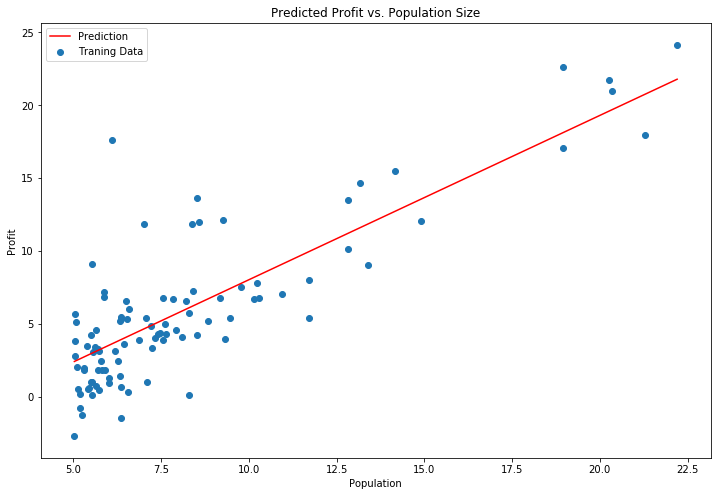

In [11]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x) #回歸線
    
fig, ax = plt.subplots(figsize=(12,8)) 
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population') 
ax.set_ylabel('Profit') 
ax.set_title('Predicted Profit vs. Population Size')



Text(0.5, 1.0, 'Error vs. Training Epoch')

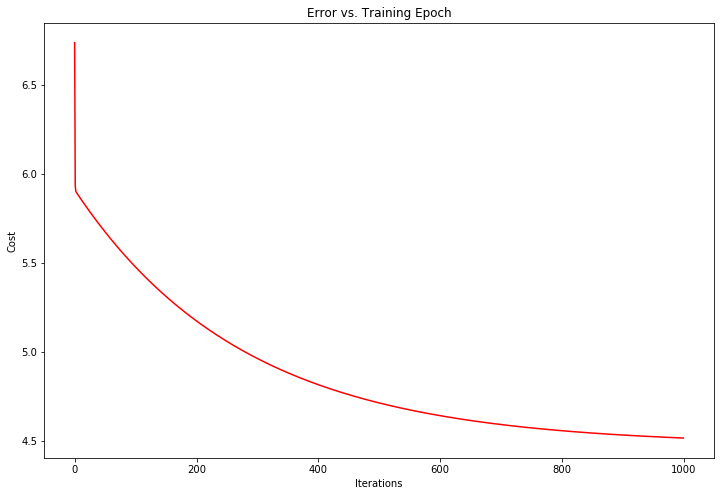

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### 方法二：利用 scikit-learn 套件實現待變量線性回歸

In [13]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

x = np.array(X[:, 1].A1)
f_ = model.predict(X).flatten()

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

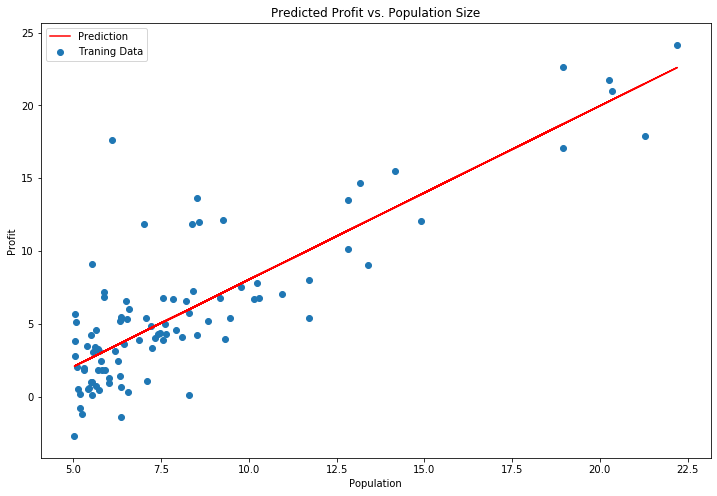

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f_, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

## 討論

### 1. 加入 early stopping，並提高跌代次數，則會在幾次收斂？

In [15]:
def gradientDescent1(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
    
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
          
        theta = temp
        cost[i] = computeCost(X, y, theta)
       
        if(cost[i-1]-cost[i]<10**-10)&(i>0):
            print("Early stopping in iter",i)
            break
        
    return theta, cost
    print("i:",i)

In [16]:
iters1 = 10000
g1, cost1 = gradientDescent1(X, y, theta, alpha, iters1)
g1

Early stopping in iter 4923


matrix([[-3.89522991,  1.19297829]])

### 2. 加入Add error point，觀察對結果的影響

(98, 2)


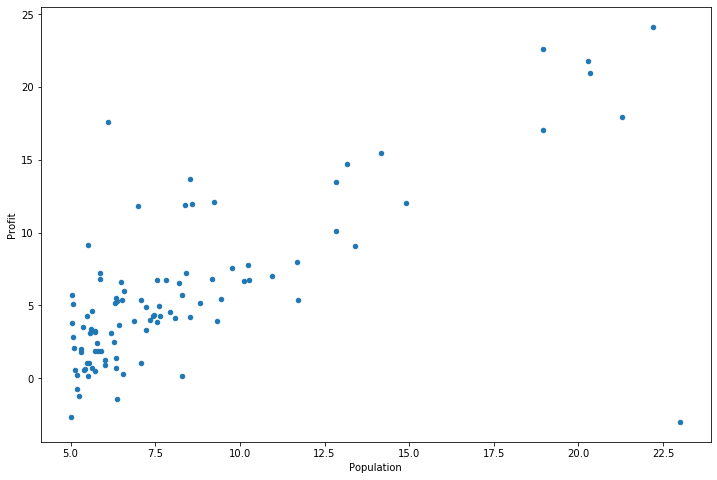

In [17]:
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data2 = data.append({'Population':23,'Profit':-3},ignore_index=True)  #加入一個error point
print(data2.shape)
data2.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

[[-1.88453373  0.92606323]]


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

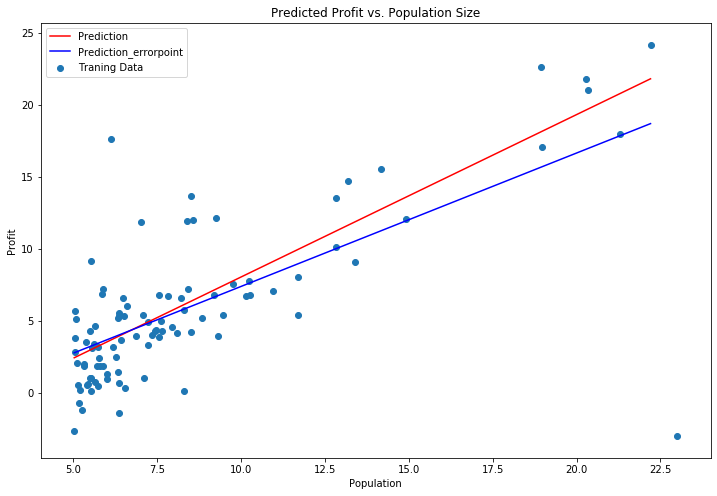

In [18]:
data2.insert(0, 'Ones', 1)
# X:training data ， y:target
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta = np.matrix(np.array([0,0]))

alpha = 0.01 #learning rate
iters2 = 10000

g2, cost2 = gradientDescent(X2, y2, theta, alpha, iters)
print(g2)

x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x) #回歸線
f2 = g2[0, 0] + (g2[0, 1] * x) #回歸線
    
fig, ax = plt.subplots(figsize=(12,8)) 
ax.plot(x, f, 'r', label='Prediction')
ax.plot(x, f2, 'b', label='Prediction_errorpoint')
ax.scatter(data2.Population, data2.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population') 
ax.set_ylabel('Profit') 
ax.set_title('Predicted Profit vs. Population Size')


**此討論目的在探討：偏離值對最佳化結果的傷害**

由上圖結果可知  
加入error point (偏離值)後，回歸直線明顯趨近偏離值的方向  
此結果發現，偏離值會造成預估誤差增加  

而 error point / outlier (偏離值)的解決方法有很多，例如:  
* 刪除偏離值
* 增加資料的總數，藉由增加資料總數來稀釋偏離值對於最佳化結果的影響
* regulation

### 加入Data normalize，並討論其好處

In [19]:
from sklearn import linear_model
model2 = linear_model.LinearRegression(normalize=True)
model2.fit(X, y)


x = np.array(X[:, 1].A1)
f_2 = model2.predict(X)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

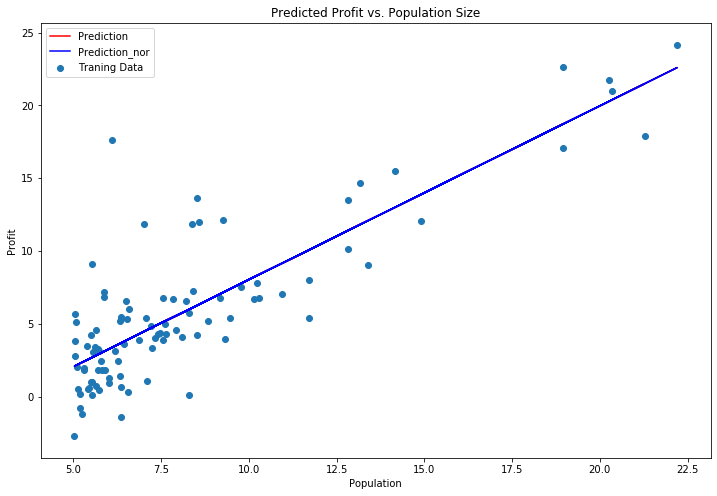

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f_, 'r', label='Prediction')
ax.plot(x, f_2, 'b', label='Prediction_nor')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

**此討論目的在探討：Data normalize對最佳化過程的幫助**  
做Data normalize的原因：
每批訓練資料的分佈各不相同，那模型訓練就要在每次反覆運算去學習適應不同的分佈  
這樣將會大大降低網路的訓練速度，所以才需要對資料normalize

Data normalize的兩個好處：
1. 提升模型的收斂速度
2. 提升模型的精度

Data normalize的方法：
對訓練資料進行預處理，常見的預處理有:
* 將資料 normalize 到 [-1,1] 區間
* 將資料 normalize 到 [0,1] 區間，
* 將資料 normalize 到 平均值為 0 ，標準差為 1 